In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


NAmes      326
CollgCr    188
OldTown    166
Sawyer     115
Edwards    112
Gilbert    112
Somerst    111
NWAmes      99
NridgHt     95
SawyerW     85
BrkSide     85
Mitchel     84
Crawfor     69
NoRidge     46
IDOTRR      43
Timber      42
StoneBr     38
SWISU       32
MeadowV     30
ClearCr     27
BrDale      21
Blmngtn     18
NPkVill     18
Veenker     15
Greens       7
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',


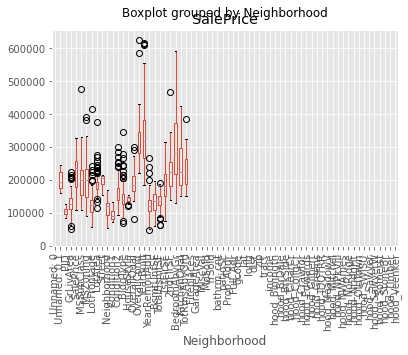

In [2]:
from clean_data import * 

In [3]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal',
       'MoSold', 'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr',
       'gcode', 'lat', 'long', 'dist', 'zip', 'tract', 'income',
       'hood_Blmngtn', 'hood_BrDale', 'hood_BrkSide', 'hood_ClearCr',
       'hood_CollgCr', 'hood_Crawfor', 'hood_Edwards', 'hood_Gilbert',
       'hood_Greens', 'hood_IDOTRR', 'hood_MeadowV', 'hood_Mitchel',
       'hood_NPkVill', 'hood_NWAmes', 'hood_NoRidge', 'hood_NridgHt',
       'hood_OldTown', 'hood_SWISU', 'hood_Sawyer', 'hood_SawyerW',
       'hood_Somerst', 'hood_StoneBr', 'hood_Timber', 'hood_Veenker',
       'FinBsmtSF', 'TotalSF', 'bsmt_above_ratio', 'MSZon

In [4]:
sf = train.TotalSF/10
type(sf)

pandas.core.series.Series

<AxesSubplot:xlabel='long', ylabel='lat'>

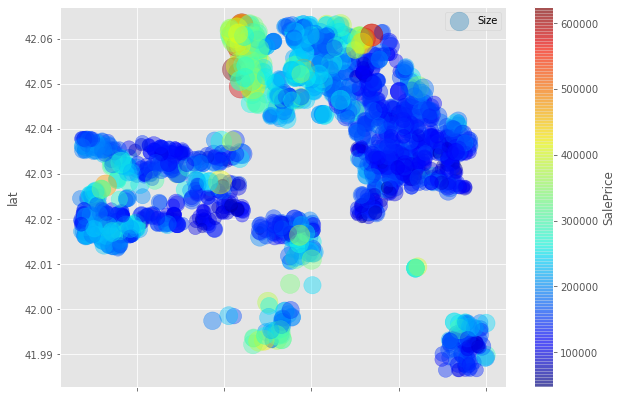

In [5]:
sf = train.TotalSF/10
type(sf)

train.plot(kind = 'scatter', x = 'long',y = 'lat', alpha = 0.4, \
           s = sf, label = 'Size', figsize = (10,7),\
           c = 'SalePrice', cmap = plt.get_cmap('jet'), colorbar = True)

<AxesSubplot:xlabel='long', ylabel='lat'>

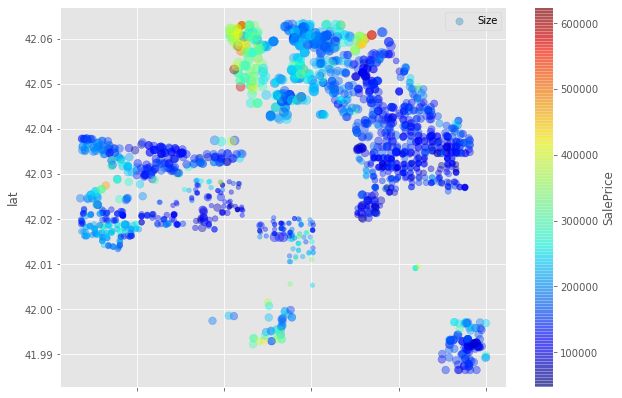

In [6]:
inc = train.income/1000

train.plot(kind = 'scatter', x = 'long',y = 'lat', alpha = 0.4, \
           s = inc, label = 'Size', figsize = (10,7),\
           c = 'SalePrice', cmap = plt.get_cmap('jet'), colorbar = True)

In [7]:
max(train['SalePrice'])
min(train['SalePrice'])

46500

In [9]:
import folium
import branca.colormap as cm

#colormap = cm.LinearColormap(colors=['blue','red'], index=[40000,500000],vmin=40000,vmax=625000)

colormap = cm.StepColormap(
    colors=['#00ae53', '#86dc76', '#daf8aa',
            '#ffe6a4', '#ff9a61', '#ee0028'],
    vmin=min(train['SalePrice']),
    vmax=max(train['SalePrice']),
    index=[45000, 75000, 150000, 200000, 300000, 400000, 700000])



map1 = folium.Map(
    location=[42.0267,-93.6465],
    tiles='cartodbpositron',
    zoom_start=12,
)
train.apply(lambda row:folium.Circle(location=[row["lat"], row["long"]], radius=((row['income'])**2/1e8), fill=True, color=colormap(row['SalePrice'])).add_to(map1), axis=1)
map1


#osmMap = map1.Map(location=[48.85, 2.35], tiles="OpenStreetMap", zoom_start=10)
map1.save('map.html')
map1

# Check Sales price for normality

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


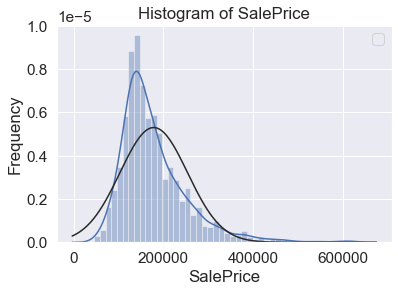

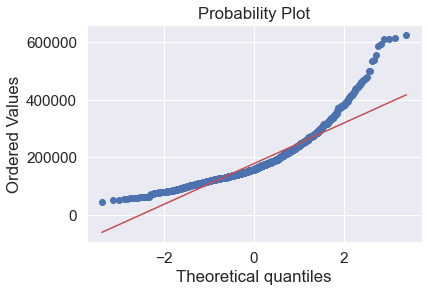

In [20]:

mu, sigma = norm.fit(train['SalePrice'])
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')

sns.distplot(train['SalePrice'], fit=norm)
#plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');

fig = plt.figure()
res = probplot(train['SalePrice'], plot=plt);

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


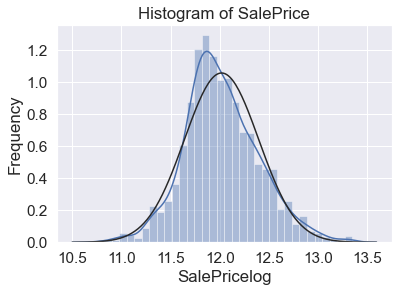

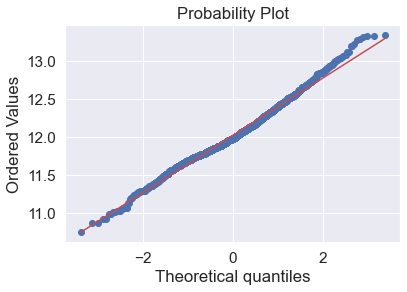

In [21]:
train['SalePricelog'] = np.log(train['SalePrice'])

mu, sigma = norm.fit(train['SalePricelog'])
sns.distplot(train['SalePricelog'], fit=norm)
#plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');

fig = plt.figure()
res = probplot(train['SalePricelog'], plot=plt);

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


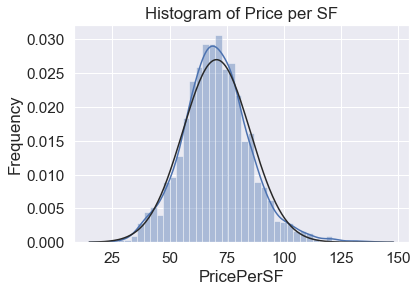

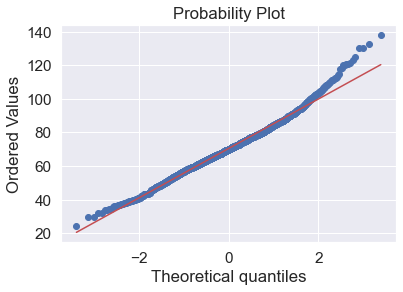

In [22]:
train['PricePerSF'] = train['SalePrice']/train['TotalSF']
train.columns
mu, sigma = norm.fit(train['PricePerSF'])
sns.distplot(train['PricePerSF'], fit=norm)
#plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of Price per SF');

fig = plt.figure()
res = probplot(train['PricePerSF'], plot=plt);


In [23]:
# Calculate skewness
numerical = train.dtypes[train.dtypes != 'object'].index

skewness = train[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skewness': skewness})
skewness_df.head(10)

# NOT used for now

,Skewness
MiscVal,20.287545
hood_Greens,16.720496
LotArea,13.526458
hood_Veenker,11.352282
MSZoning_RH,10.647141
hood_NPkVill,10.339152
hood_Blmngtn,10.339152
hood_BrDale,9.549932
hood_ClearCr,8.382905
hood_MeadowV,7.934024


# Correlation of different variables 

In [24]:
cols = ['GrLivArea','MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal',
       'MoSold', 'YrSold', 'bathrm_cnt', 'patioSF', 'dist', 'income',
       'Bedr_ratio','Bsmt_ratio','PricePerSF',]

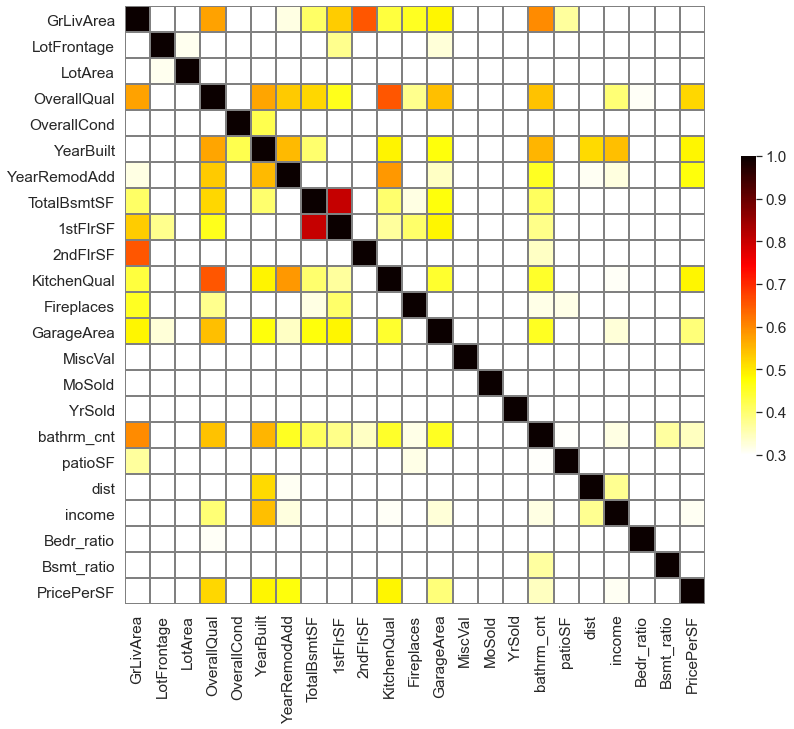

In [25]:
from copy import copy
train_corr = train[cols].corr()
train_corr = abs(train_corr)
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)]=True

#conditions for filtering 0.6<=r<=0.9
sns.set(font_scale=1.4)

cmap =  copy(plt.cm.hot_r)
cmap.set_over("white")
cmap.set_under("white")


with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,11))
    sns.heatmap(abs(train_corr),
                vmax = 1,
                vmin = 0.3,
                cmap = cmap,
                cbar_kws = {'shrink':.5},
                linewidth = 1,
               linecolor = "grey");






In [26]:
train_corr = train_corr.iloc[[0,3,5,6,7,8,9,10,11,12,13,15,19,21,22,23,24,25],[0,3,5,6,7,8,9,10,11,12,13,15,19,21,22,23,24,25]]
train_corr = train_corr.iloc[:,0:12]

mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)]=True
sns.set(font_scale=1.4)

cmap =  copy(plt.cm.hot_r)
cmap.set_over("white")
cmap.set_under("white")


with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,11))
    sns.heatmap(abs(train_corr),
                vmax = 1,
                vmin = 0.5,
                cmap = cmap,
                mask = mask,
                cbar_kws = {'shrink':.5},
                linewidth = 1,
                linecolor = "grey");



IndexError: positional indexers are out-of-bounds

# Explore Collinearity

Coefficients: 
 [1.35595084]
Mean squared error: 151189.64
Coefficient of determination: 0.73


([], [])

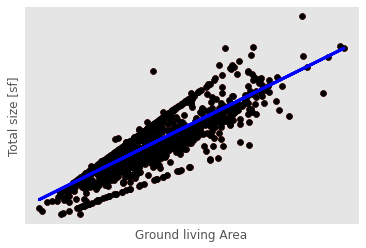

In [10]:
# Ground Living Area and Total Sf.
plt.scatter(train['GrLivArea'],train['TotalSF'])
plt.ylabel('Total size [sf]')
plt.xlabel('Ground living Area')


# creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
x = train[['GrLivArea']]
lm.fit(x,train['TotalSF'])
Y_P =  lm.predict(x)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(train['TotalSF'], Y_P))
## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['TotalSF'], Y_P))

## Plot outputs
plt.scatter(x, train['TotalSF'],  color='black')
plt.plot(x, Y_P, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

#plt.show()
#### ELIMINATE TOTAL AREA

Coefficients: 
 [363.58433159]
Mean squared error: 318704.11
Coefficient of determination: 0.43


([], [])

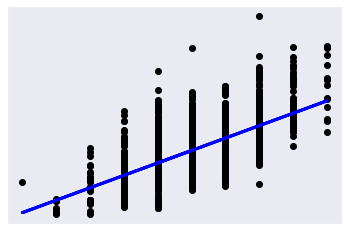

In [28]:
# Quality and Total Sf.
# creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
x = train[['OverallQual']]
lm.fit(x,train['TotalSF'])
Y_P =  lm.predict(x)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(train['TotalSF'], Y_P))
## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['TotalSF'], Y_P))

## Plot outputs
plt.scatter(x, train['TotalSF'],  color='black')
plt.plot(x, Y_P, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

#plt.show()


Coefficients: 
 [0.31170249]
Mean squared error: 0.24
Coefficient of determination: 0.43


Text(0.5, 0, 'Quality')

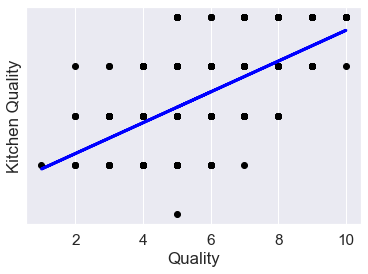

In [29]:
# Quality and Kitchen Quality
# creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
x = train[['OverallQual']]
y = train['KitchenQual']
lm.fit(x,y)
Y_P =  lm.predict(x)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y, Y_P))
## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, Y_P))

## Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, Y_P, color='blue', linewidth=3)

plt.yticks(())
plt.ylabel('Kitchen Quality')
plt.xlabel('Quality')

#plt.show()
## Remove total size

Coefficients: 
 [0.91237143]
Mean squared error: 62137.19
Coefficient of determination: 0.65


Text(0.5, 0, '1st Floor SF')

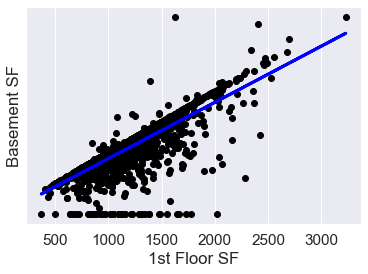

In [30]:
# 1stFloor and Basement total

lm = LinearRegression()
# fitting the training data
x = train[['1stFlrSF']]
y = train['TotalBsmtSF']
lm.fit(x,y)
Y_P =  lm.predict(x)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y, Y_P))
## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, Y_P))

## Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, Y_P, color='blue', linewidth=3)

plt.yticks(())
plt.ylabel('Basement SF')
plt.xlabel('1st Floor SF')

#plt.show()
# I Think this will give us a problem. Maybe we can do a dummy for finished or not? 

In [31]:
# ROOMS ABOVE GROUNG and BEDROOMS above ground?????

In [32]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal',
       'MoSold', 'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr',
       'gcode', 'lat', 'long', 'dist', 'zip', 'tract', 'income',
       'hood_Blmngtn', 'hood_BrDale', 'hood_BrkSide', 'hood_ClearCr',
       'hood_CollgCr', 'hood_Crawfor', 'hood_Edwards', 'hood_Gilbert',
       'hood_Greens', 'hood_IDOTRR', 'hood_MeadowV', 'hood_Mitchel',
       'hood_NPkVill', 'hood_NWAmes', 'hood_NoRidge', 'hood_NridgHt',
       'hood_OldTown', 'hood_SWISU', 'hood_Sawyer', 'hood_SawyerW',
       'hood_Somerst', 'hood_StoneBr', 'hood_Timber', 'hood_Veenker',
       'FinBsmtSF', 'TotalSF', 'MSZoning_RH', 'MSZoning_R

<AxesSubplot:title={'center':'SalePricelog'}, xlabel='OverallQual'>

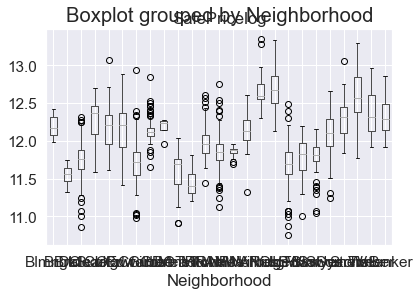

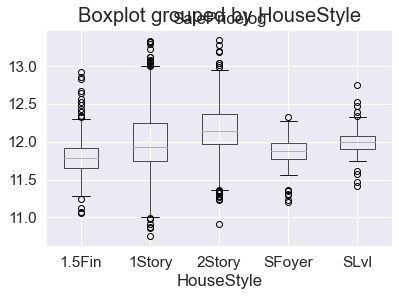

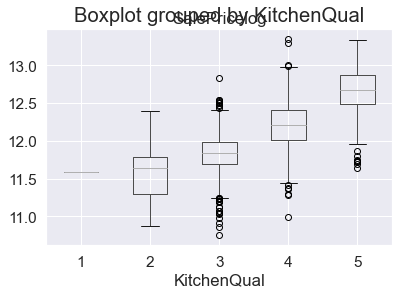

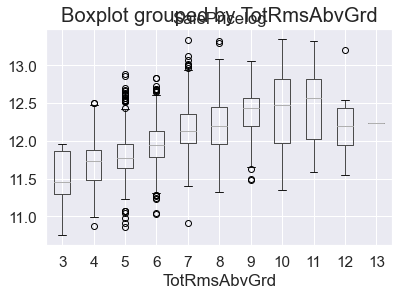

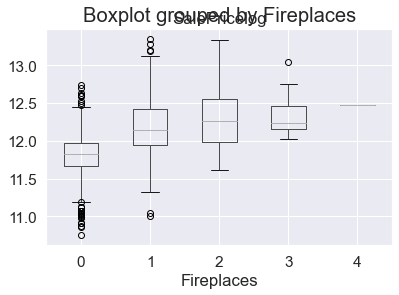

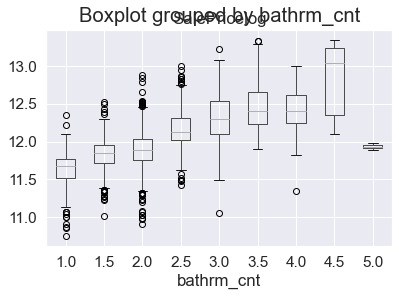

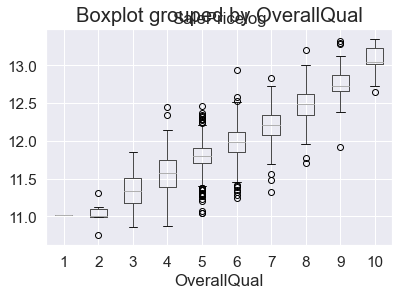

In [33]:
train.boxplot(column ='SalePricelog', by = 'Neighborhood')
train.boxplot(column ='SalePricelog', by = 'HouseStyle')
train.boxplot(column ='SalePricelog', by = 'KitchenQual')
train.boxplot(column ='SalePricelog', by = 'TotRmsAbvGrd')
train.boxplot(column ='SalePricelog', by = 'Fireplaces')
train.boxplot(column ='SalePricelog', by = 'bathrm_cnt')
train.boxplot(column ='SalePricelog', by = 'OverallQual')



<AxesSubplot:xlabel='bathrm_cnt', ylabel='PricePerSF'>

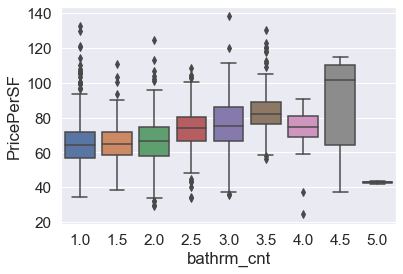

In [34]:
grouped = train[['PricePerSF', 'bathrm_cnt']].groupby(['bathrm_cnt']).median().sort_values(by='bathrm_cnt')

sns.boxplot(x=train.bathrm_cnt, y=train.PricePerSF, order=grouped.index)

<AxesSubplot:xlabel='HouseStyle', ylabel='PricePerSF'>

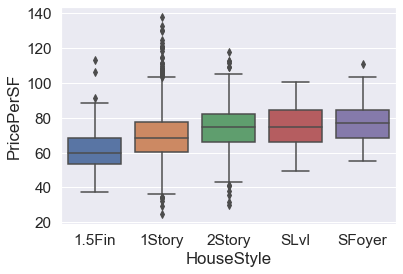

In [35]:
grouped = train[['PricePerSF', 'HouseStyle']]\
.groupby(['HouseStyle']).median().sort_values(by='PricePerSF')

sns.boxplot(x=train.HouseStyle, y=train.PricePerSF, order=grouped.index)

<AxesSubplot:xlabel='KitchenQual', ylabel='PricePerSF'>

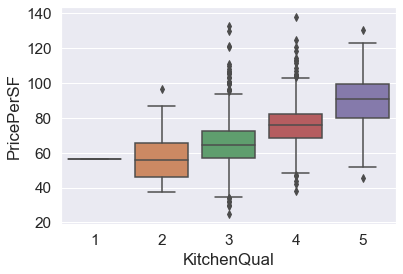

In [36]:
grouped = train[['PricePerSF', 'KitchenQual']]\
.groupby(['KitchenQual']).median().sort_values(by='KitchenQual')

sns.boxplot(x=train.KitchenQual, y=train.PricePerSF, order=grouped.index)

<AxesSubplot:xlabel='OverallQual', ylabel='PricePerSF'>

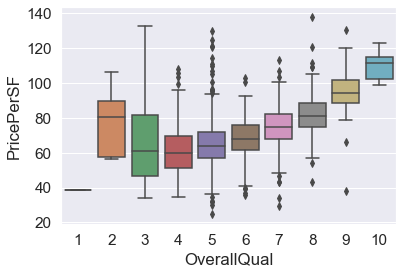

In [37]:
grouped = train[['PricePerSF', 'OverallQual']]\
.groupby(['OverallQual']).median().sort_values(by='OverallQual')

sns.boxplot(x=train.OverallQual, y=train.PricePerSF, order=grouped.index)

[Text(0, 0, 'IDOTRR'),
 Text(1, 0, 'OldTown'),
 Text(2, 0, 'MeadowV'),
 Text(3, 0, 'SWISU'),
 Text(4, 0, 'Edwards'),
 Text(5, 0, 'BrDale'),
 Text(6, 0, 'BrkSide'),
 Text(7, 0, 'NPkVill'),
 Text(8, 0, 'NAmes'),
 Text(9, 0, 'NWAmes'),
 Text(10, 0, 'Sawyer'),
 Text(11, 0, 'Veenker'),
 Text(12, 0, 'Mitchel'),
 Text(13, 0, 'SawyerW'),
 Text(14, 0, 'ClearCr'),
 Text(15, 0, 'Blmngtn'),
 Text(16, 0, 'Crawfor'),
 Text(17, 0, 'CollgCr'),
 Text(18, 0, 'Gilbert'),
 Text(19, 0, 'Timber'),
 Text(20, 0, 'Somerst'),
 Text(21, 0, 'NoRidge'),
 Text(22, 0, 'Greens'),
 Text(23, 0, 'StoneBr'),
 Text(24, 0, 'NridgHt')]

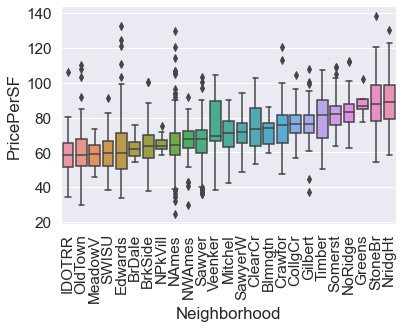

In [38]:
grouped = train[['PricePerSF', 'Neighborhood']]\
.groupby(['Neighborhood']).median().sort_values(by='PricePerSF')

g = sns.boxplot(x=train.Neighborhood, y=train.PricePerSF, order=grouped.index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePricelog'>

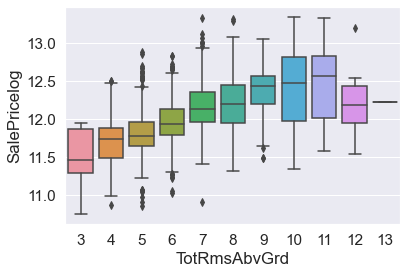

In [39]:
grouped = train[['SalePricelog', 'TotRmsAbvGrd']]\
.groupby(['TotRmsAbvGrd']).median().sort_values(by='TotRmsAbvGrd')

sns.boxplot(x=train.TotRmsAbvGrd, y=train.SalePricelog, order=grouped.index)



<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='PricePerSF'>

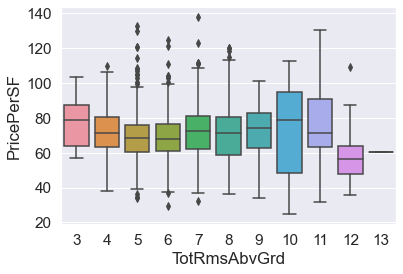

In [40]:

grouped = train[['PricePerSF', 'TotRmsAbvGrd']]\
.groupby(['TotRmsAbvGrd']).median().sort_values(by='TotRmsAbvGrd')

sns.boxplot(x=train.TotRmsAbvGrd, y=train.PricePerSF, order=grouped.index)

<AxesSubplot:xlabel='Fireplaces', ylabel='PricePerSF'>

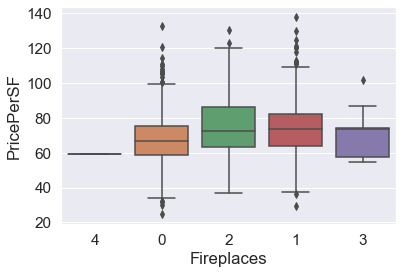

In [41]:
grouped = train[['PricePerSF', 'Fireplaces']]\
.groupby(['Fireplaces']).median().sort_values(by='PricePerSF')

sns.boxplot(x=train.Fireplaces, y=train.PricePerSF, order=grouped.index)

[Text(0, 0, '1950'),
 Text(1, 0, '1953'),
 Text(2, 0, '1951'),
 Text(3, 0, '1957'),
 Text(4, 0, '1954'),
 Text(5, 0, '1960'),
 Text(6, 0, '1965'),
 Text(7, 0, '1970'),
 Text(8, 0, '1963'),
 Text(9, 0, '1958'),
 Text(10, 0, '1967'),
 Text(11, 0, '1989'),
 Text(12, 0, '1955'),
 Text(13, 0, '1969'),
 Text(14, 0, '1973'),
 Text(15, 0, '1959'),
 Text(16, 0, '1975'),
 Text(17, 0, '1962'),
 Text(18, 0, '1961'),
 Text(19, 0, '1956'),
 Text(20, 0, '1972'),
 Text(21, 0, '1964'),
 Text(22, 0, '1968'),
 Text(23, 0, '1971'),
 Text(24, 0, '1976'),
 Text(25, 0, '1952'),
 Text(26, 0, '1966'),
 Text(27, 0, '1993'),
 Text(28, 0, '1990'),
 Text(29, 0, '1988'),
 Text(30, 0, '1974'),
 Text(31, 0, '1985'),
 Text(32, 0, '1986'),
 Text(33, 0, '1978'),
 Text(34, 0, '1980'),
 Text(35, 0, '1987'),
 Text(36, 0, '1992'),
 Text(37, 0, '1977'),
 Text(38, 0, '1984'),
 Text(39, 0, '1979'),
 Text(40, 0, '1991'),
 Text(41, 0, '1981'),
 Text(42, 0, '1999'),
 Text(43, 0, '1996'),
 Text(44, 0, '1998'),
 Text(45, 0, '1995')

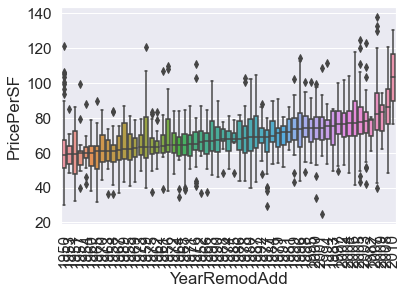

In [42]:
grouped = train[['PricePerSF', 'YearRemodAdd']]\
.groupby(['YearRemodAdd']).median().sort_values(by='PricePerSF')

g = sns.boxplot(x=train.YearRemodAdd, y=train.PricePerSF, order=grouped.index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<AxesSubplot:xlabel='MSZoning', ylabel='PricePerSF'>

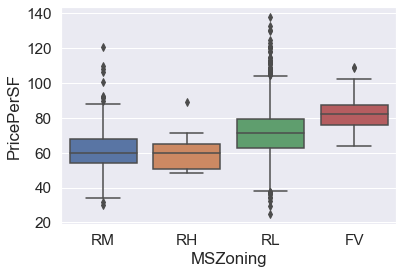

In [43]:
grouped = train[['PricePerSF', 'MSZoning']]\
.groupby(['MSZoning']).median().sort_values(by='PricePerSF')

sns.boxplot(x=train.MSZoning, y=train.PricePerSF, order=grouped.index)



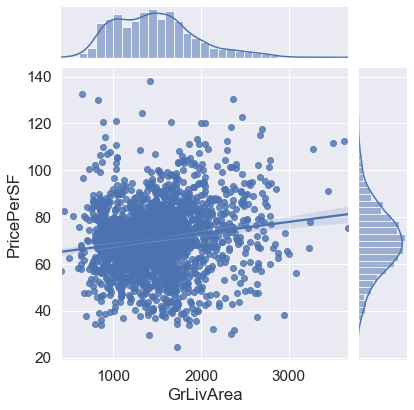

In [44]:
# Living Area vs Sale Price
sns.jointplot(x=train['GrLivArea'], y=train['PricePerSF'], kind='reg')



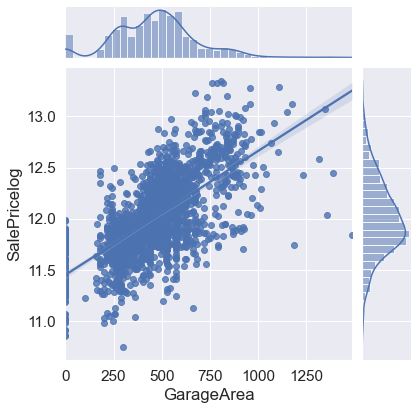

In [45]:
# Garage Area vs Sale Price
sns.jointplot(x=train['GarageArea'], y=train['SalePricelog'], kind='reg')

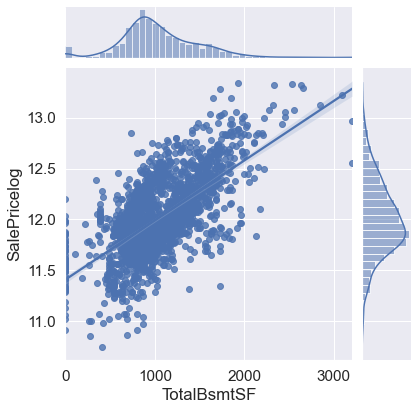

In [46]:
sns.jointplot(x=train['TotalBsmtSF'], y=train['SalePricelog'], kind='reg')

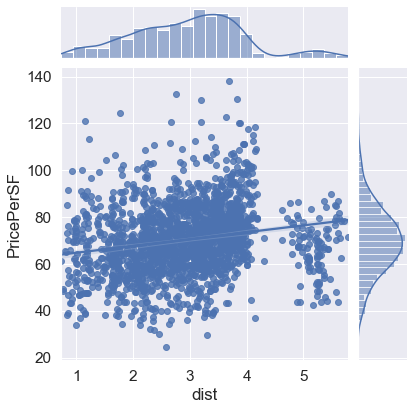

In [47]:
# Living Area vs Sale Price
sns.jointplot(x=train['dist'], y=train['PricePerSF'], kind='reg')


# SIMPLE LINEAR MODEL

In [50]:
Y = train['SalePrice']/train['TotalSF']
X1 = train[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 
           'KitchenQual', 'Fireplaces', 'GarageArea', 
           'MiscVal', 'bathrm_cnt', 'patioSF', 'dist', 'income', 
           'hood_Blmngtn', 'hood_BrDale', 'hood_BrkSide', 'hood_ClearCr', 
            'hood_CollgCr', 'hood_Crawfor', 'hood_Edwards', 'hood_Gilbert', 
            'hood_Greens', 'hood_IDOTRR', 'hood_MeadowV', 'hood_Mitchel', 
            'hood_NPkVill', 'hood_NWAmes', 'hood_NoRidge', 'hood_NridgHt', 
            'hood_OldTown', 'hood_SWISU', 'hood_Sawyer', 'hood_SawyerW', 
           'hood_Somerst', 'hood_StoneBr', 'hood_Timber', 'hood_Veenker', 
           'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'NearRR', 'NearPos', 
           'Artery', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 
           'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_2Story', 
           'HouseStyle_SFoyer', 'HouseStyle_SLvl','Bsmt_ratio','Bedr_ratio',
           'TotalBsmtSF']]


In [52]:
# creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(X1,Y)

Y_P =  lm.predict(X1)

score=r2_score(Y,Y_P)
print('r2 score is %0.3f' %score)
print('mean_sqrd_error is= %.3f' %mean_squared_error(Y, Y_P))
print('root_mean_squared error of is= %.3f' %np.sqrt(mean_squared_error(Y, Y_P)))

r2 score is 0.682
mean_sqrd_error is= 69.443
root_mean_squared error of is= 8.333


In [53]:
x = sm.add_constant(X1)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(Y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     76.21
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:40:28   Log-Likelihood:                -7000.5
No. Observations:                1978   AIC:                         1.411e+04
Df Residuals:                    1923   BIC:                         1.442e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -50.5885     27.61

In [54]:
# Feature selection
sig_features = results.pvalues[results.pvalues > 0.05].index.tolist()
sig_features


['const',
 'LotFrontage',
 'MiscVal',
 'income',
 'hood_Blmngtn',
 'hood_BrDale',
 'hood_Edwards',
 'hood_IDOTRR',
 'hood_MeadowV',
 'hood_Mitchel',
 'hood_NPkVill',
 'hood_NWAmes',
 'hood_SWISU',
 'hood_SawyerW',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'NearRR',
 'HouseStyle_SLvl']

In [ ]:

try: 
    sig_features.remove('const')
except: pass

In [55]:
sig_features

['const',
 'LotFrontage',
 'MiscVal',
 'income',
 'hood_Blmngtn',
 'hood_BrDale',
 'hood_Edwards',
 'hood_IDOTRR',
 'hood_MeadowV',
 'hood_Mitchel',
 'hood_NPkVill',
 'hood_NWAmes',
 'hood_SWISU',
 'hood_SawyerW',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'NearRR',
 'HouseStyle_SLvl']